## python 기본기 테스트 level 4

타이타닉 탑승객들의 정보가 담겨있는 csv 파일이 주어집니다.  
python 언어로 데이터 셋 파일을 읽고, 분석해봅시다!  
간단한 시각화 자료도 만들어봅니다.

In [1]:
!pip install matplotlib


[notice] A new release of pip is available: 23.1.2 -> 23.3.1
[notice] To update, run: pip install --upgrade pip


### Q1. csv 파일 row 개수 읽기

data 폴더 아래 위치한 titanic_train.csv 파일을 읽어온 뒤, 로우의 개수를 리턴하는 함수를 작성하세요.  
컬럼명을 나타내는 로우는 제외하세요.  
with 문과 open을 사용하고, for문, enumerate문을 사용하세요.

In [39]:
import csv

def count_rows_cols(read_path):
    num_rows = 0
    with open(read_path) as fr:
        reader = csv.reader(fr)
        for i, row in enumerate(reader):
            if i == 0:
                continue
            num_rows += 1
    return num_rows 

In [40]:
count_rows_cols("./data/titanic_train.csv")

891

### Q2. 각 등급별 생존율 계산하기

파일 경로와 좌석 등급을 파라미터로 전달받는 calculate_survive_ratio 함수가 있습니다.  
titanic_train.csv 파일을 읽어온 뒤, 파라미터로 전달받은 좌석의 생존율을 계산해서 리턴하세요.

In [41]:
def calculate_survive_ratio(read_path, seat_class):
    total = 0
    survived = 0
    with open(read_path) as fr:
        reader = csv.reader(fr)
        next(reader)
        for row in reader:
            is_survived = int(row[1])
            pclass = int(row[2])
            if pclass != seat_class:
                continue
            total += 1
            if is_survived == 1:
                survived += 1
    return survived / total

In [42]:
print(calculate_survive_ratio("./data/titanic_train.csv", 1))
print(calculate_survive_ratio("./data/titanic_train.csv", 2))
print(calculate_survive_ratio("./data/titanic_train.csv", 3))

0.6296296296296297
0.47282608695652173
0.24236252545824846


### Q3. 전처리 후 새 데이터 파일 쓰기

titanic_train.csv 파일을 읽은 뒤, Age 값이 비어있거나, 이상한 값(소수)이 들어있는 행을 제외한 행들을 preprocessed.csv라는 파일에 쓰세요.   
preprocessed.csv의 첫 행은 컬럼명으로 채워주세요.  
isnumeric 함수를 검색해서 용도를 파악하고 사용해보세요.  

In [43]:
def write_preprocess_csv(read_path, write_path):
    with open(read_path) as fr:
        reader = csv.reader(fr)
        with open(write_path, "w") as fw:
            writer = csv.writer(fw)
            for i, row in enumerate(reader):
                if i == 0:
                    writer.writerow(row)
                    continue
                age = row[5]
                if not age or not age.isnumeric():
                    continue
                writer.writerow(row)

In [44]:
sample_int = "10"
print(sample_int.isnumeric())
sample_float = "10.5"
print(sample_float.isnumeric())

True
False


In [46]:
write_preprocess_csv("./data/titanic_train.csv", "./data/preprocessed_train.csv")
count_rows_cols("./data/preprocessed_train.csv")

689

### Q4. 생존자 연령 평균 구하기

읽어올 파일 경로, 생존 여부를 파라미터로 전달받는 함수가 있습니다.
파일을 읽어온 뒤, 생존 여부에 따른 평균 연령을 계산해서 리턴하세요.

In [60]:
def calculate_average_age(read_path, is_survived):
    ages = []
    with open(read_path) as fr:
        reader = csv.reader(fr)
        next(reader)
        for row in reader:
            survived = int(row[1])
            if survived != is_survived:
                continue
            age = int(row[5])
            ages.append(age)
    return sum(ages) / len(ages)

In [61]:
survivor_avg_age = calculate_average_age("./data/preprocessed.csv", 1) 
unsurvivor_avg_age = calculate_average_age("./data/preprocessed.csv", 0) 
print("생존자 평균 연령", survivor_avg_age)
print("사망자 평균 연령", unsurvivor_avg_age)

생존자 평균 연령 29.01418439716312
사망자 평균 연령 30.425061425061426


### Q5. 생존자 성별 비율 구하기

읽어올 파일 경로, 생존 여부를 파라미터로 전달받는 함수가 있습니다.  
파일을 읽어온 뒤, 생존 여부에 따른 여성의 비율을 계산해서 리턴하세요. 

In [73]:
def calculate_female_ratio(read_path, is_survived):
    total = 0
    female = 0
    with open(read_path) as fr:
        reader = csv.reader(fr)
        next(reader)
        for row in reader:
            survived = int(row[1])
            if survived != is_survived:
                continue
            total += 1
            sex =  row[4]
            if sex == "female":
                female += 1
    return female / total

In [74]:
survivor_female_ratio = calculate_female_ratio("./data/preprocessed_train.csv", is_survived=1)
unsurvivor_female_ratio = calculate_female_ratio("./data/preprocessed_train.csv", is_survived=0)
print("생존자 여성 비율", survivor_female_ratio)
print("사망자 여성 비율", unsurvivor_female_ratio)

생존자 여성 비율 0.6879432624113475
사망자 여성 비율 0.15233415233415235


### Q6. 히스토그램 그려보기

히스토그램은 자료를 구간별로 나눠서 빈도 수를 측정한 뒤에 시각화하는 가장 기본적인 데이터 시각화 기법입니다.  
생존자와 사망자가 지불한 운임을 각각 히스토그램으로 그려보겠습니다.  

먼저 파일 경로와 생존 여부를 파라미터로 전달받으면 조건에 맞는 탑승객들이 지불한 운임을 리턴하는 함수를 작성해보세요.

In [3]:
import csv
import seaborn as sns

def get_fare_list(read_path, is_survived):
    fare_list = []
    with open(read_path) as fr:
        reader = csv.reader(fr)
        next(reader)
        for row in reader:
            survived = int(row[1])
            if survived != is_survived:
                continue
            fare = float(row[9])
            fare_list.append(fare) 
    return fare_list

In [4]:
survivor_fare_list = get_fare_list("./data/preprocessed_train.csv", is_survived=1) 
unsurvivor_fare_list = get_fare_list("./data/preprocessed_train.csv", is_survived=0) 

In [5]:
print(len(survivor_fare_list), survivor_fare_list[:5])
print(len(unsurvivor_fare_list), unsurvivor_fare_list[:5])

282 [71.2833, 7.925, 53.1, 11.1333, 30.0708]
407 [7.25, 8.05, 51.8625, 21.075, 8.05]


그 다음 아래 코드를 실행해서 히스토그램을 그려보겠습니다.  
시각화와 관련해서는 따로 자세히 배워보는 시간을 갖겠습니다.  

<Axes: ylabel='Count'>

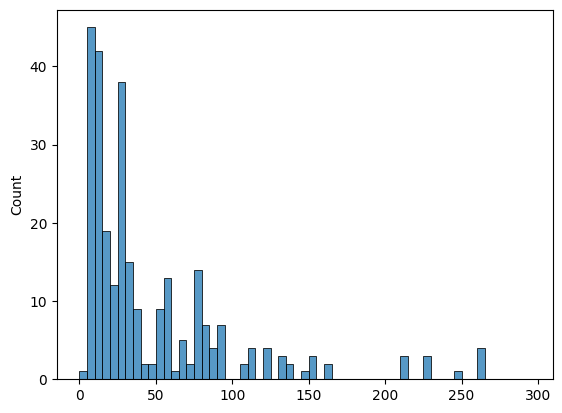

In [8]:
fare_bins = [x for x in range(0, 300, 5)]
sns.histplot(
    data=survivor_fare_list,
    bins=fare_bins
)

<Axes: ylabel='Count'>

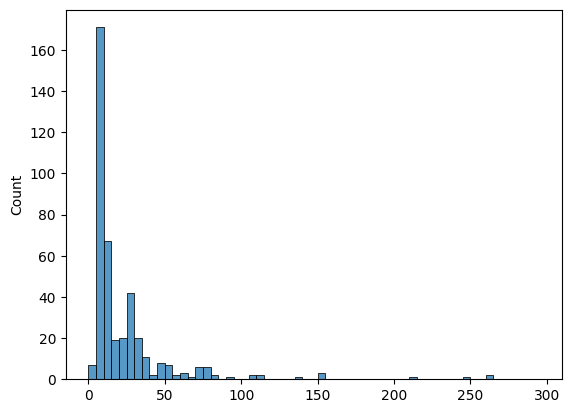

In [9]:
sns.histplot(
    data=unsurvivor_fare_list,
    bins=fare_bins
)

### Q7. 생존 여부 별 나이 히스토그램 그려보기

비슷하게 생존 여부에 따른 나이의 분포 히스토그램도 그려보겠습니다.  
먼저 파일 경로와 생존 여부를 전달받으면 나이 리스트를 리턴하는 함수를 작성하겠습니다.

In [10]:
def get_age_list(read_path, is_survived):
    age_list = []
    with open(read_path) as fr:
        reader = csv.reader(fr)
        next(reader)
        for row in reader:
            survived = int(row[1])
            if survived != is_survived:
                continue
            age = int(row[5])
            age_list.append(age) 
    return age_list 

In [13]:
survivor_age_list = get_age_list("./data/preprocessed_train.csv", is_survived=1) 
unsurvivor_age_list = get_age_list("./data/preprocessed_train.csv", is_survived=0) 
print(len(survivor_age_list), survivor_age_list[:5])
print(len(unsurvivor_age_list), unsurvivor_age_list[:5])

282 [38, 26, 35, 27, 14]
407 [22, 35, 54, 2, 20]


<Axes: ylabel='Count'>

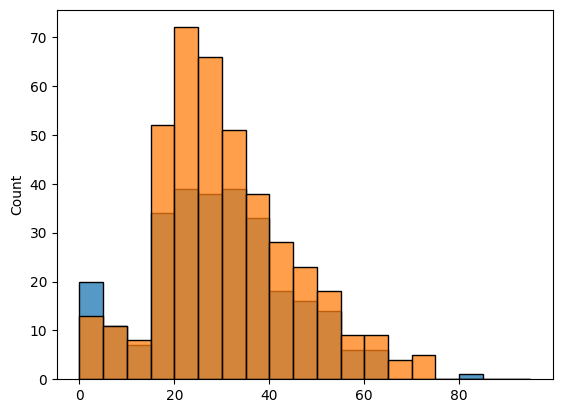

In [16]:
from matplotlib import pyplot as plt

age_bins = [x for x in range(0, 100, 5)]
sns.histplot(
    data=survivor_age_list,
    bins=age_bins
)
sns.histplot(
    data=unsurvivor_age_list,
    bins=age_bins
)

### Q8. 자유 데이터 분석

여기까지 다하셨다면 이제 자유롭게 데이터 분석을 하면서 생존 여부에 영향을 미친 요소를 파악해보세요.